# West Nile Preparation
This notebook prepares the data for my visualization. Two files are created from the supplied input.
* data/West_Nile_Virus_by_County.csv: supplied data; cases reported each week by county
* data/population.csv: county population data gathered from the California Department of Finance
* data/population_west_nile.csv: created; cases aggregated by year; augmented with county population
* data/region_west_nile.csv: created; cases aggregated by region of California

## Look at supplied data

In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_west_nile = pd.DataFrame.from_csv('data/West_Nile_Virus_by_County.csv', index_col=None)

In [3]:
df_west_nile.head()

,Year,Week_Reported,County,id,Positive_Cases
0,2006,35,Alameda,6001,1
1,2006,33,Butte,6007,4
2,2006,34,Butte,6007,1
3,2006,35,Butte,6007,10
4,2006,36,Butte,6007,2


In [4]:
df_west_nile.describe()

,Year,Week_Reported,id,Positive_Cases
count,1395.000000,1395.000000,1395.000000,1395.000000
mean,2010.881720,38.907527,6057.649462,2.772043
std,3.078304,5.791268,31.743046,3.862923
min,2006.000000,9.000000,6001.000000,1.000000
25%,2008.000000,35.000000,6029.000000,1.000000
50%,2012.000000,38.000000,6059.000000,1.000000
75%,2014.000000,43.000000,6077.000000,3.000000
max,2015.000000,53.000000,6115.000000,31.000000


## Aggregate cases by year, normalize by county population
County population taken from: 
* http://www.dof.ca.gov/research/demographic/reports/estimates/e-2/documents/E-2_Report_July2010-2015w.xls
* http://www.dof.ca.gov/research/demographic/reports/estimates/e-2/2000-10/ 

Not all counties have west nile cases, so need to do an outer join when combining the population data with the west nile data. The county ID, used for geographical plotting comes from the west nile dataset; thus we need to fill in the missing county IDs too. 

In [5]:
df_population = pd.DataFrame.from_csv('data/population.csv')
new_col = []
for c in df_population.columns:
    new_col.append('population_' + c)
df_population.columns =  new_col
df_population.head()


,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011,population_2012,population_2013,population_2014,population_2015
county,,,,,,,,,,
Alameda,1464839,1476401,1491781,1503827,1513493,1531511,1553219,1574688,1598779,1619244
Alpine,1255,1248,1208,1180,1147,1170,1166,1164,1164,1165
Amador,37964,38085,37864,37905,37907,37894,37746,37582,37448,37302
Butte,215684,217115,218485,219287,220024,220651,221788,222113,223589,224301
Calaveras,45316,45638,45702,45562,45258,45414,45305,45116,45010,44881


In [6]:
by_county = df_west_nile.groupby('County')
df_county_id = pd.DataFrame(by_county['id'].first())
df_county_id.head()

,id
County,
Alameda,6001
Amador,6005
Butte,6007
Calaveras,6009
Colusa,6011


In [7]:
#not all counties have west nile cases, need to do an outer join so we keep these counties
np.shape(df_county_id), np.shape(df_population)

((46, 1), (58, 10))

In [8]:
df_population_id = pd.merge(df_population, df_county_id, left_index=True, right_index=True, how='outer')
df_population_id.index.name = 'county'
df_population_id.head()


,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011,population_2012,population_2013,population_2014,population_2015,id
county,,,,,,,,,,,
Alameda,1464839,1476401,1491781,1503827,1513493,1531511,1553219,1574688,1598779,1619244,6001
Alpine,1255,1248,1208,1180,1147,1170,1166,1164,1164,1165,NaN
Amador,37964,38085,37864,37905,37907,37894,37746,37582,37448,37302,6005
Butte,215684,217115,218485,219287,220024,220651,221788,222113,223589,224301,6007
Calaveras,45316,45638,45702,45562,45258,45414,45305,45116,45010,44881,6009


In [9]:
#for which counties do we need to find the ID?
df_population_id[np.isnan(df_population_id['id'])]

,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011,population_2012,population_2013,population_2014,population_2015,id
county,,,,,,,,,,,
Alpine,1255,1248,1208,1180,1147,1170,1166,1164,1164,1165,NaN
Del Norte,28276,28480,28571,28559,28577,28200,27978,27507,27177,27089,NaN
Humboldt,132226,132657,133201,133766,134575,135158,134629,134646,134419,134825,NaN
Inyo,18421,18447,18383,18448,18627,18536,18569,18585,18640,18697,NaN
Lassen,35011,35749,35120,34773,34730,34540,33016,32299,31803,30988,NaN
Mariposa,18244,18376,18385,18281,18119,18237,18223,18154,18128,18097,NaN
Plumas,20710,20596,20368,20063,19993,19927,19883,19769,19720,19675,NaN
San Benito,54895,55000,55043,55093,55350,55894,56333,56750,57168,57572,NaN
San Mateo,699398,704272,711374,716264,719582,728649,739544,747431,754639,762327,NaN


In [10]:
#looked these up online, make sure they're not in use already
missing_ids = [6003, 6015, 6023, 6027, 6035, 6043, 6063, 6069, 6081, 6091, 6105, 6109]
for m in missing_ids:
    if any(df_population_id['id'] == m):
        print 'already in use: ', m
print 'done'

done


In [11]:
#add the missing IDs
idx =  df_population_id[np.isnan(df_population_id['id'])].index
for i in range(len(idx)):
    df_population_id.loc[idx[i],'id'] = missing_ids[i]

In [12]:
#strings need to start with 0 to match the topoJSON
for i in df_population_id.index:
    df_population_id.loc[i, 'id_str'] = '0' + str(int(df_population_id.loc[i]['id']))
df_population_id.head()

,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011,population_2012,population_2013,population_2014,population_2015,id,id_str
county,,,,,,,,,,,,
Alameda,1464839,1476401,1491781,1503827,1513493,1531511,1553219,1574688,1598779,1619244,6001,06001
Alpine,1255,1248,1208,1180,1147,1170,1166,1164,1164,1165,6003,06003
Amador,37964,38085,37864,37905,37907,37894,37746,37582,37448,37302,6005,06005
Butte,215684,217115,218485,219287,220024,220651,221788,222113,223589,224301,6007,06007
Calaveras,45316,45638,45702,45562,45258,45414,45305,45116,45010,44881,6009,06009


In [13]:
by_county_year = df_west_nile.groupby(['County', 'Year'])
df_county_year = pd.DataFrame(by_county_year['Positive_Cases'].sum())

In [14]:
for i in df_population_id.index:
    for y in range(2006, 2016):
        col_wnc = 'west_nile_cases_' + str(y)
        col_wnr = 'west_nile_rate_' + str(y)
        col_pop = 'population_' + str(y)
        try:
            cases = df_county_year.loc[i,y]['Positive_Cases']
            
        except KeyError:
            cases = 0
        df_population_id.loc[i, col_wnc] = cases
        df_population_id.loc[i, col_wnr] = cases / float(df_population_id.loc[i][col_pop] / 100000.0)
df_population_id.head()

,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011,population_2012,population_2013,population_2014,population_2015,...,west_nile_cases_2011,west_nile_rate_2011,west_nile_cases_2012,west_nile_rate_2012,west_nile_cases_2013,west_nile_rate_2013,west_nile_cases_2014,west_nile_rate_2014,west_nile_cases_2015,west_nile_rate_2015
county,,,,,,,,,,,,,,,,,,,,,
Alameda,1464839,1476401,1491781,1503827,1513493,1531511,1553219,1574688,1598779,1619244,...,0,0.000000,2,0.128765,0,0.000000,1,0.062548,0,0.000000
Alpine,1255,1248,1208,1180,1147,1170,1166,1164,1164,1165,...,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
Amador,37964,38085,37864,37905,37907,37894,37746,37582,37448,37302,...,1,2.638940,0,0.000000,0,0.000000,0,0.000000,0,0.000000
Butte,215684,217115,218485,219287,220024,220651,221788,222113,223589,224301,...,3,1.359613,10,4.508810,24,10.805311,24,10.733981,53,23.628963
Calaveras,45316,45638,45702,45562,45258,45414,45305,45116,45010,44881,...,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000


In [15]:
#look at stats on the west nile rates
rate_values = []
for y in range(2006, 2016): 
    col = 'west_nile_rate_' + str(y)
    rate_values.append(df_population_id[col].values)

temp = [item for sublist in rate_values for item in sublist]
rate_values = [v for v in temp if v > 0]
print np.mean(rate_values), np.median(rate_values), np.min(rate_values)

3.20037051862 1.25544584296 0.0314979677511


Populating the interactive namespace from numpy and matplotlib


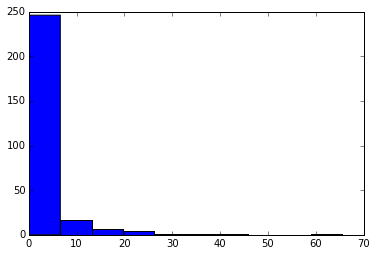

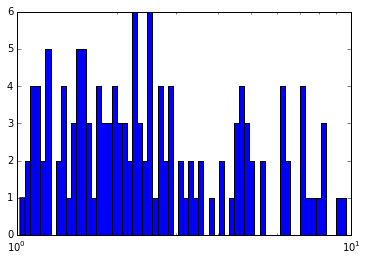

In [16]:
#rate is a log scale... useful to know when adding a color scheme
%pylab inline

plt.hist(rate_values)
plt.show()

plt.hist(rate_values, bins=np.logspace(0.01, 1.0, 66))
plt.gca().set_xscale("log")
plt.show()

## Aggregate by region
50+ counties is too much for a bar chart. Instead group them by their region and give each a unique week ID. County regions taken from: https://www.tes.com/lessons/GWdcg3b_m9e1TA/california-regions


In [17]:
#load mapping of regions to counties
import json
regions_dictionary = json.load(open('data/california_counties.json'))

In [18]:
regions_dictionary

{u'Central Coast': [u'Contra Costa',
  u'Alameda',
  u'San Francisco',
  u'San Mateo',
  u'Santa Clara',
  u'Santa Cruz',
  u'San Benito',
  u'Monterey',
  u'San Luis Obispo'],
 u'Central Valley': [u'Tehama',
  u'Butte',
  u'Glenn',
  u'Colusa',
  u'Yuba',
  u'Sutter',
  u'Yolo',
  u'Sacramento',
  u'Solano',
  u'San Joaquin',
  u'Stanislaus',
  u'Merced',
  u'Madera',
  u'Fresno',
  u'Kings',
  u'Tulare',
  u'Kern'],
 u'Foothill and Mountain': [u'Siskiyou',
  u'Modoc',
  u'Trinity',
  u'Shasta',
  u'Lassen',
  u'Plumas',
  u'Sierra',
  u'Nevada',
  u'Placer',
  u'El Dorado',
  u'Amador',
  u'Alpine',
  u'Calaveras',
  u'Tuolumne',
  u'Mariposa'],
 u'Inland Empire': [u'Mono',
  u'Inyo',
  u'San Bernardino',
  u'Riverside',
  u'Imperial'],
 u'North Coast': [u'Del Norte',
  u'Humboldt',
  u'Mendocino',
  u'Lake',
  u'Napa',
  u'Sonoma',
  u'Marin'],
 u'South Coast': [u'Santa Barbara',
  u'Ventura',
  u'Los Angeles',
  u'Orange',
  u'San Diego']}

In [19]:
#for ease, invert the mapping, and apply to the original dataframe
def invert(d):
    return dict( (v,k) for k in d for v in d[k] )

counties_to_regions_map = invert(regions_dictionary)

def get_region(row):
    return counties_to_regions_map[row['County']]

df_west_nile['Region'] = df_west_nile.apply(get_region, axis=1)

   

In [27]:
df_regional = df_west_nile.drop(['County', 'id'], axis=1)
df_regional.head()

,Year,Week_Reported,Positive_Cases,Region
0,2006,35,1,Central Coast
1,2006,33,4,Central Valley
2,2006,34,1,Central Valley
3,2006,35,10,Central Valley
4,2006,36,2,Central Valley


In [28]:
def get_unique_week(row):
    year_offset = row['Year'] - 2006
    return row['Week_Reported'] + (52*year_offset)

df_regional['Week'] = df_regional.apply(get_unique_week, axis=1)
df_regional.tail()

,Year,Week_Reported,Positive_Cases,Region,Week
0,2006,35,1,Central Coast,35
1,2006,33,4,Central Valley,33
2,2006,34,1,Central Valley,34
3,2006,35,10,Central Valley,35
4,2006,36,2,Central Valley,36


In [30]:
by_week_region = df_regional.groupby(['Week', 'Region'])
df_week_region = pd.DataFrame(by_week_region['Positive_Cases'].sum())
df_week_region.head()


,,Positive_Cases
Week,Region,
25,Central Valley,1
29,Central Valley,4
30,Central Valley,11
31,Central Valley,4
32,Central Valley,16


In [43]:
#pivot the table
df_week_region = df_week_region.reset_index()
df_week_region = df_week_region.pivot('Week', 'Region', 'Positive_Cases')
df_week_region.head()

Region,Central Coast,Central Valley,Foothill and Mountain,Inland Empire,North Coast,South Coast
Week,,,,,,
25,NaN,1,NaN,NaN,NaN,NaN
29,NaN,4,NaN,NaN,NaN,NaN
30,NaN,11,NaN,NaN,NaN,NaN
31,NaN,4,NaN,NaN,NaN,NaN
32,NaN,16,1,NaN,NaN,1


In [47]:
#replace NaN's
df_week_region = df_week_region.fillna(0)
df_week_region.head()

Region,Central Coast,Central Valley,Foothill and Mountain,Inland Empire,North Coast,South Coast
Week,,,,,,
25,0,1,0,0,0,0
29,0,4,0,0,0,0
30,0,11,0,0,0,0
31,0,4,0,0,0,0
32,0,16,1,0,0,1


In [50]:
#df_week_region.to_csv('data/region_west_nile.csv')